# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['target'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


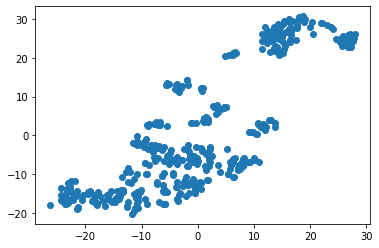

In [29]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


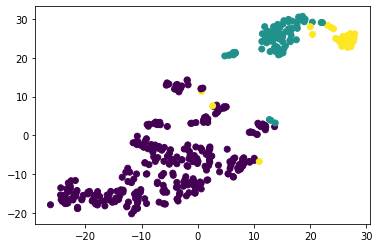

In [134]:
from sklearn.cluster import KMeans

clusters = 3
model = KMeans(n_clusters=clusters, max_iter=100, random_state=42)
model.fit(X_train)
train_labels = model.predict(X_train)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

In [136]:
train_labels_frame = pd.DataFrame(train_labels, columns=['label'], index=X_train.index)
for i in range(clusters):
    print('label=', i)
    print('price=', np.mean(y_train.loc[train_labels_frame['label'] == i, 'target']))
    print('CRIM= ', np.mean(X_train.loc[train_labels_frame['label'] == i, 'CRIM']))

label= 0
price= 25.168686868686873
CRIM=  0.40486282828282844
label= 1
price= 17.4421052631579
CRIM=  11.745661842105266
label= 2
price= 13.196774193548386
CRIM=  14.360380322580648


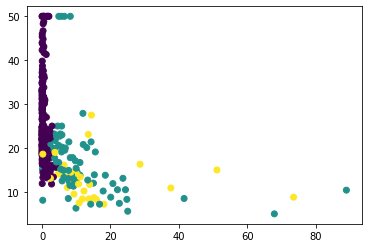

In [117]:
plt.scatter(X_train.loc[:, 'CRIM'], y_train, c=train_labels)

# * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [137]:
test_labels = model.predict(X_test)

test_labels_frame = pd.DataFrame(test_labels, columns=['label'], index=X_test.index)
for i in range(clusters):
    print('label=', i)
    print('price=', np.mean(y_test.loc[test_labels_frame['label'] == i, 'target']))
    print('CRIM= ', np.mean(X_test.loc[test_labels_frame['label'] == i, 'CRIM']))

label= 0
price= 23.911594202898552
CRIM=  0.2464211594202899
label= 1
price= 17.39230769230769
CRIM=  8.469301923076923
label= 2
price= 12.814285714285713
CRIM=  19.021665714285714


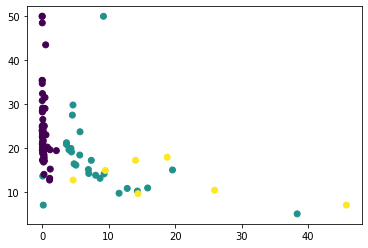

In [133]:
plt.scatter(X_test.loc[:, 'CRIM'], y_test, c=test_labels)